<a href="https://colab.research.google.com/github/simonebugo/Big_Data/blob/main/Esercizio_in_aula_Fairness.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ci sono diverse tecniche per capire la fariness di un modello e di capire l'importanza di ogni feature nel dataset quando andiamo ad allenare il modelo e fare predizione -> fairness e feature importance
è importante una volta allenato il modello capire come questo modello agisce, perchè il modello fa deterrminate predizioni ed è importane capire se queste sono eque rispetto a feature sensibilie (come il genere). nell'esempio di oggi se abbiamo il dataset e il nostro scopo è di predirre se la persona verrà assunta o meno è importante che il modello che fa le predizioni non si basi troppo sul genere. non impari che se sei donna non vieni assunta mentre se sei uomo si. è imporante che le predizioni del modello siano eque rispetto a questi attributi sensibili. un modo per verificare questa equità è, dopo aver fatto le predizioni, di calcolare la probabilità di essere assunto se sono uomo e se sono dona. se questa probabilità sono simili, vuol dire che probabililmente il modello si sta comportando bene rispeotto all'attriuìbuto sensibie. quindi ricapitolando: alleno il modello, calcolo le predizioni sul dataset di test, e usando solo questo dataset di test calcolo la probabioità di essere o non essere assunto se sono uomo o donna, e queste devono essere piuttosto simili.
esiste un altra funzioni in python detta demographic_parity_ratio che mi da un informazione sull'equità del modello. questa funziona ritorna un numero che se sufficentemente vicino a 1 indica che il modello è equo (altrimenti c'è un problema di bias) --> l'esercizio 4 che vedremo richiede questo


gli esercizi 5 e 6 invece vogliono andare ad analizzare la feature importace di tutte le feature nel dataset. ci sono 2 tecniche:
- Permutation Feature Importance->ci dice che ho tante feature nel dataset quindi il mio dataset è fatto da tante feature che compongono la X del dataset e poi ho il target. ai valori di queste feature corrisponde un certo target che è quello che voglio predirre. la tecnica di permutation feature importance ci dice di andare a turno (uina feature per volta) di andare a permutare i valori di queste feature. prendendo in considerazione una feature alla volta e mescolando i valori rompo i pattern che potrebbero essere, se vado a calcolare le performance con la feature permutata e vedo come queste sono. se queste performance diminuiscono vuol dire che la feature è importante. se invece le perforamcne migliroano vuol dire che la fueature non è importante, ho rotto i pattern che mi poteva dare la feature, e se il modello migliora nonostante abbia rotto i legami vuol dire che la feature non era importante ai fini della predizioni. nell'esercizio 5 ogni volta che faccio le permutazioni non è necessario andare a riallenare il modello. l'abbiamo allenato una volta, dopo lavoriamo solo su x test, faccio permutazioni e dopo lavoro sulle performance. per avere il risultato più robusto nell'esercizio c'è scritto di non fare un unica permutazione per ogni feature ma di farne più di una. ho allenato il modello,lavoro solo su x test, prendo solo una feature alla volta, faccio 10 permutazioni per ogni feature e calcolo 10 volte le predizioni. questo mi permette di avere più risultati per la stessa feature permutata. in questo modo riesco ad avere un risultato più robusto.
- Leave-One-Covariate-Out -> vado ad eliminare uno alla volta le feature di x test (e anche di x train siccome devo andare a riallenare il modello ogni volta) e vedo come variano le performance. se le performance migliorano significa che la feature non è importante, se invece peggiorano vorrà dire che la feature era importante ai fini delle predizioni. nell'es6 ogni volta che vado ad eliminare una feature dobbiamo riallenare il modello, il modello deve essere riallenato sulle feature su cui è testato. ho il dataset, elimino una feature alla volta, alleno il modello, faccio le predizioni, calcolo le performance.



**ESERCITAZIONE**

Il dataset (preso e modificato da kaggle) si trova al link https://bit.ly/4ckMxMd e contiene dati relativi ad alcuni candidati da
assumere in un’azienda. Si vuole predire se un candidato verrà assunto (HiringDecision).

**1. Quante sono le istanze contenute nel dataset? Il dataset è completo (cioè per ogni istanza sono sempre specificati tutti i
valori di ogni attributo)? Il dataset è bilanciato rispetto alla classe da predire?**

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("dataset.csv")

In [6]:
df

,id,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,0,26,1,2,0,3,26.783828,48,78,91,1,1
1,1,39,1,4,12,3,25.862694,35,68,80,2,1
2,2,48,0,2,3,2,9.920805,20,67,13,2,0
3,3,34,1,2,5,2,6.407751,36,27,70,3,0
4,4,30,0,1,6,1,43.105343,23,52,85,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,1495,48,0,2,3,4,9.183783,66,3,80,3,1
1496,1496,27,1,2,10,3,14.847731,43,97,7,2,0
1497,1497,24,1,1,1,2,4.289911,31,91,58,1,1
1498,1498,48,0,2,4,4,36.299263,9,37,44,2,1


id è una feature inutile al fine delle predizioni quindi andrà eliminata prima di fare il traint-test split. gender è la feature sensibile per il calcolo della fairness del modello. hiring decision è il target

In [7]:
#controllo se ci sono valori nulli
df.isnull().sum()

,0
id,0
Age,0
Gender,0
EducationLevel,0
ExperienceYears,0
PreviousCompanies,0
DistanceFromCompany,0
InterviewScore,0
SkillScore,0
PersonalityScore,0


In [8]:
df.shape

(1500, 12)

In [9]:
#controllo se dataset è bilanciato rispetto il target
df["HiringDecision"].value_counts()
#vediamo che il dataset risulta sbilanciato, ci sono molti hiring decision = 1 rispetto al valore 0

,count
HiringDecision,
0,1035
1,465


**2. Caricare il dataset, eliminare eventuali attributi inutili (motivare la scelta), eliminare eventuali istanze con valori nulli,
dividere il dataset in train (75%) e test (25%), preservando le proporzioni delle classi del target.**

in fondo al testo d'esame c'è anche scritto: Prima delle predizioni, trasformare tutte le feature del dataset tranne Gender usando lo StandardScaler (puoi usare il
ColumnTransformer).

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import f1_score, confusion_matrix
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [11]:
Y = df["HiringDecision"]
X = df.drop(["id", "HiringDecision"], axis=1) #eliminiamo ID

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran = ColumnTransformer(transformers=[("std", StandardScaler(), ['Age', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies',
                                                                     'DistanceFromCompany', 'InterviewScore', 'SkillScore',
                                                                     'PersonalityScore', 'RecruitmentStrategy'])],
                            remainder='passthrough')
#il column transformer è applicato su tutti tranne che su gender, uso il passthrough per fare in modo che rimanga

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

#dopo la trasformazione X_train diventaerà un arry numpy, se voglio un dataframe devo
# Recuperare i nomi delle colonne trasformate
transformed_features = coltran.named_transformers_['std'].get_feature_names_out()
output_columns = list(transformed_features) + ["Gender"]

X_train = pd.DataFrame(X_train, columns=output_columns)
X_test = pd.DataFrame(X_test, columns=output_columns)

**3. Valutare le performance sia sul dataset train sia sul dataset test del modello SGDClassifier, tenendo in considerazione
F1-score e la confusion matrix.**

In [12]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import confusion_matrix,f1_score

In [14]:
model = SGDClassifier(random_state=123)
model.fit(X_train, Y_train)

trainpred = model.predict(X_train)
testpred = model.predict(X_test)

print(f"f1 on train {f1_score(Y_train,trainpred)}")
print(f"f1 on test {f1_score(Y_test,testpred)}")
print(f"confusion matrix on test \n {confusion_matrix(Y_test,testpred)}")


f1 on train 0.7370030581039755
f1 on test 0.7186147186147186
confusion matrix on test 
 [[227  32]
 [ 33  83]]


guardando la doc del SGDClassifier si vede che restituisce in output diversi attributi come coef_: i pesi assegnati a ciascuna feature dal classificatore. oltre ai coefficneti c'è il numero di feature prese in input e il nome di queste feature. una volta allenato il classificatore posso recuperare questi attributi

In [15]:
model.feature_names_in_ #feature che il modello ha utilizzato

array(['Age', 'EducationLevel', 'ExperienceYears', 'PreviousCompanies',
       'DistanceFromCompany', 'InterviewScore', 'SkillScore',
       'PersonalityScore', 'RecruitmentStrategy', 'Gender'], dtype=object)

In [16]:
model.coef_ #coeff ovvero i pesi che il classificatore assegna ad ogni feature

array([[ 0.6708708 ,  1.22738944,  0.8520273 ,  0.13260799, -0.53238017,
         0.86924477,  0.84191251,  0.08581707, -3.31732717, -0.96854176]])

tra tutti i coefficenti quello più alto (in valore assoluto) è quello relativo alla recruitmentStrategy, il secondo più importante è l'educationlevel. anche il segno è importnate, un coef negativo significa che stiamo andando verso la predizione della classe negativa, ovvero 0 che per noi è il non sei assunto, il segno + invece porta verso la classe 1 ovvero l'assunzione.
info sui coef troverà coerenza con l'analisi che andremo a fare negli ultimi 2 esercizi (feature importance)

**4. Analisi della fairness del modello: valutare, con i dati del test set e rispetto al modello SGDClassifier, se la probabilità
di predire 0 è la stessa per uomini (0) e donne (1). Il modello ha le stesse performance sul dataset degli uomini e sul
dataset delle donne? Calcolando la metrica demographic_parity_ratio della libreria fairlearn, è possibile stabilire che il
modello rispetta la “parità demografica”? Eliminare l’attributo Gender e valutare se le performance del modello ottenute
negli uomini sono le stesse ottenute nelle donne.**

due richieste diverse. la prima richiesta ci richiede di veriicare che la probabilità di predirre 0 sugli uomini sia la stessa di predirre 0 sulle donne. poi l'esercizio ci chiede di vedere se le performance del modello sono le stesse.

primo punto: dividiamo il dataset, applichiamo nuovamente lo standard scaler (si potreva utilizzare anche la trasformazione già fatta prima), alleniamo il modello e calcoliamo le predizioni. per comodità inseriamo le predizioni in X_test siccome faremo su X_test tutte le analisi. inserire le predizioni in X_test mi permette di avere la corrispondenza uomo-donna con la predizioni

In [17]:
Y = df["HiringDecision"]
X = df.drop(["id", "HiringDecision"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

X_train = pd.DataFrame(X_train, columns=output_columns)
X_test = pd.DataFrame(X_test, columns=output_columns)

model = SGDClassifier(random_state=123)
model.fit(X_train, y_train)
res = model.predict(X_test)
X_test['pred'] = res

a questo punto divido il dataset (di X_test) in uomini e donne e quindi calcolo la probabilità di non essere assunto per gli uomini e per le donne. una volta che ho il dataset di test con solo gli uomini conto quante volte il modello ha predetto 0 su questo dataset rispetto al totale di uomini e faccio lo stesso per le donne. (il numero lo trovo con la shep[0]). se vedo che le 2 probabilità sono molto diverse vuol dire che il modello si sta basando molto sul genere, quindi significa che olo il valore di gender mi può dare il risultato. se le 2 prob sono abbastanza simili invece vuol dire che il modello è abbastanza equo (per capirlo fino in fondo dovrei fare delle analisi più approfondite)

In [18]:
uomo = X_test[X_test['Gender']==0]
donna = X_test[X_test['Gender']==1]

prob_uomo = uomo[uomo['pred']==0].shape[0] / uomo.shape[0] #prob che modello attribuisce al modello di non essere assunti
prob_donna = donna[donna['pred']==0].shape[0] / donna.shape[0] #prob che il modello attribuisce alle donne di non essere assunte

print('Probabilità che un uomo non sia assunto: {}'.format(prob_uomo))
print('Probabilità che una donna non sia assunta: {}'.format(prob_donna))

Probabilità che un uomo non sia assunto: 0.6842105263157895
Probabilità che una donna non sia assunta: 0.7027027027027027


l'esercizio chiede di vedere se le performance del modello sugli uomini sono paragonabili a quello per le donne. utilizzo l'f1 score perchè prima avevamo già usato solo quello. lo calcolo solo sugli uomini prima e poi solo sulle donne

In [19]:
X_test['real'] = y_test.values

print('F1-score sugli uomini: {}'.format(f1_score(X_test[X_test['Gender']==0]['real'], uomo['pred']))) #non posso sostituire X_test[X_test['Gender']==0] con uomo siccome uomo non ha real come feature
print('F1-score sulle donne: {}'.format(f1_score(X_test[X_test['Gender']==1]['real'], donna['pred'])))

F1-score sugli uomini: 0.6964285714285714
F1-score sulle donne: 0.7394957983193278


performance piuttosto simili, sia equità che performance abbastanza simili.

In [1]:
!pip install fairlearn #occorre installare prima la libreria in esame non viene chiesto di farlo

In [2]:
from fairlearn.metrics import demographic_parity_ratio

demographic_parity_ratio: funzione che prende Y_test ovvero il vero  e la predizioni. poi accetta l'indicazione delle feature sensibili quindi qual'è la feature sensibile che la funzione deve tenere conto per calcolare l'equità. nella doc leggiamo che un valore vicino ad 1 indica che il modello è equo

In [20]:
Y = df["HiringDecision"]
X = df.drop(["id", "HiringDecision"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

X_train = pd.DataFrame(X_train, columns=output_columns)
X_test = pd.DataFrame(X_test, columns=output_columns)

model = SGDClassifier(random_state=123)
model.fit(X_train, Y_train)


demographic_parity_ratio(Y_test, model.predict(X_test), sensitive_features=X_test["Gender"])

np.float64(0.9414414414414416)

come si può vedere abbiamo un valore di 0.94 che è molto vicino ad 1 e quindi ci conferma come avevamo potuto osservare prima che il modello è abbastanza equo

anzi che usare la funzione demographic_parity_ratio potrei andare ad usare le operazioni qua sotto. infatti la funzione leggendo la doc si legge che va a fare un rapporto tra la selection rate di un gruppo e quella dell'altro quindi la prob di essere assunto per le donne e per gli uomini. (il rapporto è quello più piccolo/quello più grande).

In [21]:
prob_uomo = model.predict(X_test[X_test['Gender']==0]).sum()/len(model.predict(X_test[X_test['Gender']==0]))

In [23]:
prob_donna = model.predict(X_test[X_test['Gender']==1]).sum()/len(model.predict(X_test[X_test['Gender']==1]))

In [24]:
if prob_uomo<prob_donna:
  print(prob_uomo/prob_donna)
else:
  print(prob_donna/prob_uomo)

0.9414414414414416


l'esercizio poi richiede di elminare l'attributo gender e vedere se eliminado questo attributo i risultati del modello migliorano o peggiorano. per fare questo devo andare a riallenare il modello. per riallenare il modello prendo di nuovo X e Y, a X non elimino solo id e hiring decision ma anche gender.

In [25]:
Y = df["HiringDecision"]
X = df.drop(["id", "Gender", "HiringDecision"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

output_columns_without_gender = output_columns.copy().remove('Gender')
X_train = pd.DataFrame(X_train, columns=output_columns_without_gender)
X_test = pd.DataFrame(X_test, columns=output_columns_without_gender)

model = SGDClassifier(random_state=123)
model.fit(X_train, y_train)

f1_score(y_test, model.predict(X_test))

0.6987951807228916

vediamo che l'f1 score è del 70%, anche prima era simile quindi significa che il modello non si sta basando solo sul genere per fare la predizioni, ma il genere non porta ne vantaggio ne svantaggio sulle performance.

**5. Analisi della feature importance: applicare la tecnica Permutation Feature Importance (PFI) considerando il modello
SGDClassifier per trovare le feature più importanti. Per garantire una certa stabilità dei risultati, applicare 10
permutazioni diverse ad ogni feature. Visualizzare attraverso un boxplot per ogni feature le differenze di F1-score in ogni
permutazione.**

/tmp/ipython-input-2818108118.py:39: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(f1_scores, labels=feature_names)


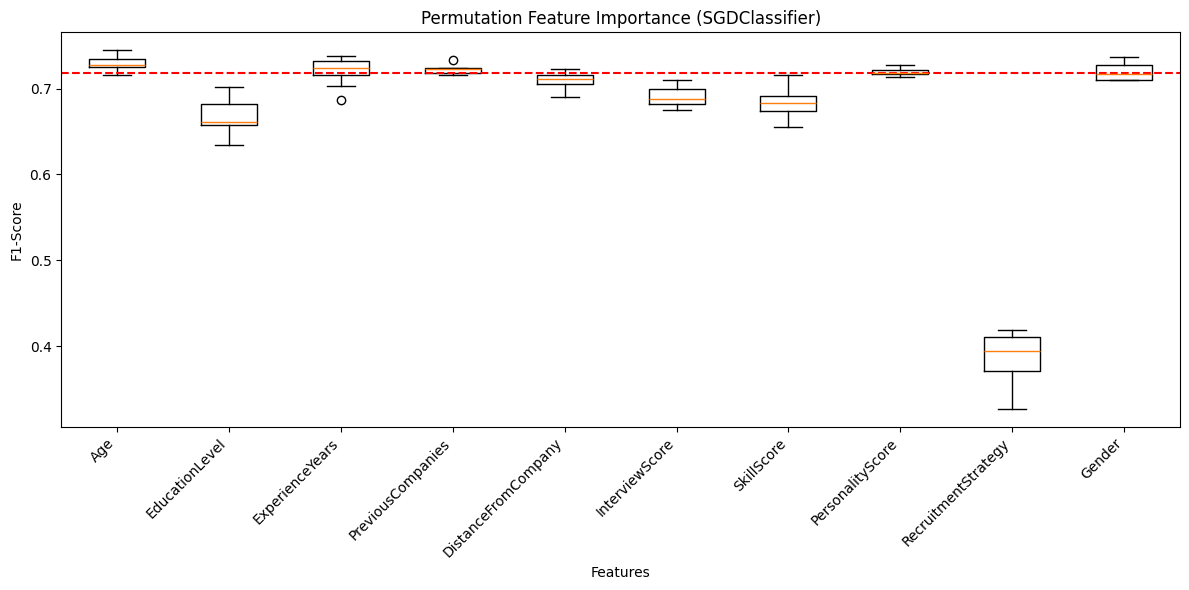

In [26]:
import matplotlib.pyplot as plt

Y = df["HiringDecision"]
X = df.drop(["id", "HiringDecision"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

X_train = pd.DataFrame(X_train, columns=output_columns)
X_test = pd.DataFrame(X_test, columns=output_columns)

model = SGDClassifier(random_state=123)
model.fit(X_train, y_train)

#per ogni feature del dataset di test faccio una permutazinoe dei valori e vedo come variano le performacne se chiamo le predizioni del modello
#allenato precedentemente sul dataset con la feature permutata. questa permutazione la faccio 10 volte
feature_names = X_test.columns
n_permutations = 10
f1_scores = [] #lista in cui inserisco i risultati degli f1 score

for feature in feature_names:
  #per ogni feature costruisco una lista di score siccome vado a calcolare 10 volte l'f1 score per ogni feature
    feature_scores = []
    f1_origin = f1_score(y_test, model.predict(X_test)) #calcolo l'f1 score senza aver fatto permutazioni alla feature
    for _ in range(n_permutations): #faccio 10 permutazioni di una feature
        X_test_permuted = X_test.copy()
        X_test_permuted[feature] = np.random.permutation(X_test_permuted[feature]) #per ogni permutazione perumot i valori con questa funzione di np
        f1_permuted = f1_score(y_test, model.predict(X_test_permuted)) #calcolo l'f1 score tra y_test (valori reali) e le perdizioni sulla feature permutata
        feature_scores.append(f1_permuted)
        #per ogni feature avrò 10 valori di f1 permutato
    f1_scores.append(feature_scores) #avrò quindi una matrice di 11 feature per 10 valori di ciascuna feautre

#posso plottare i valori degli f1scores
# Boxplot visualization
plt.figure(figsize=(12, 6))
plt.boxplot(f1_scores, labels=feature_names)
plt.title('Permutation Feature Importance (SGDClassifier)')
plt.xlabel('Features')
plt.ylabel('F1-Score')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.axhline(y=f1_origin, color='r', linestyle='--', label='Baseline (Full Dataset F1-score)')
plt.show()

ho rappresentato i valori degli f1 scores in un boxplot dove vado a rappresentare anche l'f1 score d'origine. la linea tratteggiata rappresenta le performance del modello sul dataset di origine senza nessuna feature ne eliminata ne permutata, è la baseline. se le performance migliorano vuol dire che la feature permutata non è importante. se le performcance pggiorano vuol dire che al feature considerata è importante per fare le predizioni.
ci sono dei boxplot per ogni feature perchè ho fatto 10 permutazioni quindi ho 10 valori per ogni feature. se il boxplot è piccolo vuol dire che questi 10 valori di f1 calcolati ad ogni permutazione non variano tanto tra loro. se il boxplot invece è largo vuol dire che ad ogni permutazione mi ritrovo dei valori di f1 che cambiano.
da questa rappresentazione vediamo che la strategia è molto importante per la predizione. se vado a premutatre i valori della feeature e quindi vado a rompere i pattern che il valore ha trovato, le performance peggiorano di parecchio. significa che il modello ha attribuito una certa importanza alla feature. se vado a rompere i pattern le perfoamrnce peggiorano. il coef in valore assoluto più alto che avevamo visto prima (-3.qualcosa) era quello, quindi si può vedere che il risutato è coerente con i coeffienci assegnati dal modello.

In [28]:
f1_scores #10 valori di f1 scores per ogni feature

[[0.7304347826086957,
  0.7264957264957265,
  0.7350427350427351,
  0.7445887445887446,
  0.7155172413793104,
  0.7413793103448276,
  0.7288135593220338,
  0.7257383966244726,
  0.7248908296943232,
  0.7172995780590717],
 [0.6608695652173913,
  0.6864406779661016,
  0.6896551724137931,
  0.6581196581196581,
  0.6666666666666666,
  0.658008658008658,
  0.6347826086956522,
  0.7012987012987013,
  0.6578947368421053,
  0.6609442060085837],
 [0.7280334728033473,
  0.7148936170212766,
  0.7166666666666667,
  0.7327586206896551,
  0.7213114754098361,
  0.7327586206896551,
  0.7033898305084746,
  0.7257383966244726,
  0.7381974248927039,
  0.6861924686192469],
 [0.7241379310344828,
  0.7186147186147186,
  0.7186147186147186,
  0.7241379310344828,
  0.7186147186147186,
  0.7241379310344828,
  0.721030042918455,
  0.7155172413793104,
  0.7241379310344828,
  0.7327586206896551],
 [0.7094017094017094,
  0.703862660944206,
  0.7226890756302521,
  0.7172995780590717,
  0.711864406779661,
  0.717299

**6. Analisi della feature importance: verificare se i risultati ottenuti al punto precedente sono confermati dalla tecnica
Leave-One-Covariate-Out (ovvero escludo una feature alla volta e vedo come variano le performance del modello).**

di base faccio la stessa cosa di prima però anzi che andare a permutare le feature (nel caso precedente 10 volte) andiamo ad escludere una feature alla volta e vediamo come cambiano i risultati

In [29]:
Y = df["HiringDecision"]
X = df.drop(["id", "HiringDecision"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=1/4, stratify=Y, random_state=0)

coltran.fit(X_train)
X_train = coltran.transform(X_train)
X_test = coltran.transform(X_test)

X_train = pd.DataFrame(X_train, columns=output_columns)
X_test = pd.DataFrame(X_test, columns=output_columns)

model = SGDClassifier(random_state=123)
model.fit(X_train, y_train)
f1_fulldataset = f1_score(y_test, model.predict(X_test))

feature_names = X_test.columns
f1_features = {}
#Il dizionario f1_features conterrà i valori di F1-score del modello quando una specifica feature (caratteristica) viene rimossa dal training e dal testing.

for feature in feature_names:
    model.fit(X_train.drop(feature, axis=1), y_train) #il modello in questo caso va riallenato ogni volta sul nuovo dataset senza una feature
    f1_features[feature] = f1_score(y_test, model.predict(X_test.drop(feature, axis=1)))

f1_features

{'Age': 0.7381974248927039,
 'EducationLevel': 0.6893617021276596,
 'ExperienceYears': 0.744,
 'PreviousCompanies': 0.7542372881355932,
 'DistanceFromCompany': 0.6846153846153846,
 'InterviewScore': 0.5664739884393064,
 'SkillScore': 0.6695652173913044,
 'PersonalityScore': 0.717948717948718,
 'RecruitmentStrategy': 0.3958333333333333,
 'Gender': 0.6987951807228916}

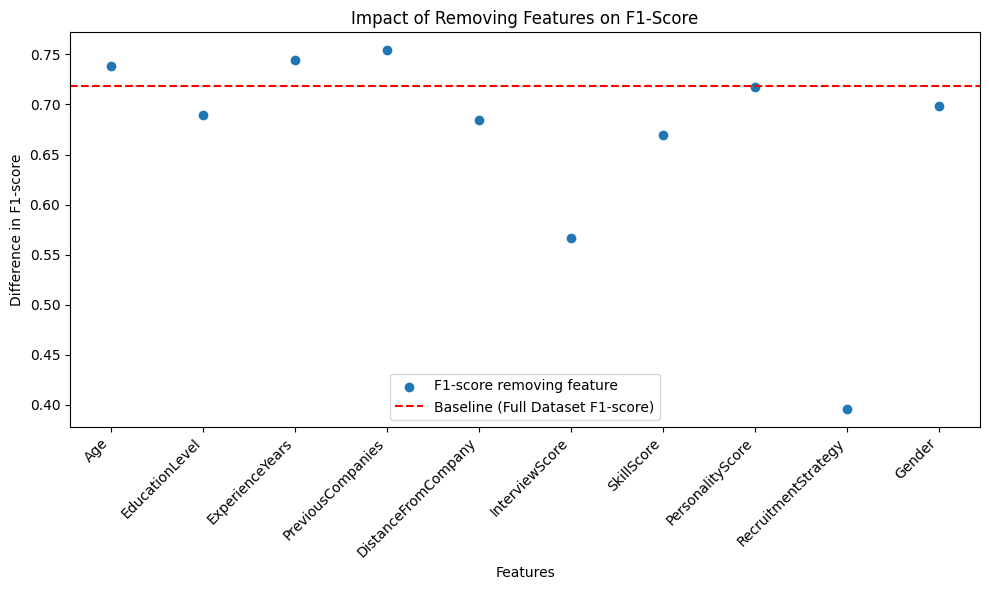

In [30]:
features = list(f1_features.keys())
f1_drops = list(f1_features.values())

plt.figure(figsize=(10, 6))
plt.scatter(features, f1_drops, label='F1-score removing feature')
plt.axhline(y=f1_fulldataset, color='r', linestyle='--', label='Baseline (Full Dataset F1-score)')

plt.xlabel("Features")
plt.ylabel("Difference in F1-score")
plt.title("Impact of Removing Features on F1-Score")
plt.xticks(rotation=45, ha="right")
plt.legend(loc='lower center')
plt.tight_layout()
plt.show()

come si può vedere plottando i risultati i valori sono coerenti con quelli visti applicando la tecnica delle permutazioni